In [1]:
# ============================================
# Celda 1: Importar librerías necesarias
# ============================================

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("✅ Librerías importadas correctamente.")


✅ Librerías importadas correctamente.


In [2]:
# ============================================
# Celda 2: Cargar y explorar el dataset
# ============================================

# Cargar dataset desde la URL
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

print("✅ Dataset cargado correctamente.")
print("\nPrimeras filas del dataset:")
display(data.head())

print("\nInformación general del dataset:")
print(data.info())


✅ Dataset cargado correctamente.

Primeras filas del dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
# ============================================
# Celda 3: Preprocesamiento de datos (corregida)
# ============================================

# Convertir variables categóricas en numéricas
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar variables (features) y etiquetas (labels)
X = data_encoded.drop("charges", axis=1)  # <-- corregido
y = data_encoded["charges"]               # <-- corregido

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Datos preprocesados correctamente.")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


✅ Datos preprocesados correctamente.
Tamaño del conjunto de entrenamiento: (1070, 8)
Tamaño del conjunto de prueba: (268, 8)


In [5]:
# ============================================
# Celda 4: Crear y entrenar el modelo
# ============================================

# Crear un modelo secuencial simple de regresión
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # salida: valor continuo de costo médico
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='mae',       # Mean Absolute Error
    metrics=['mae']
)

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=0
)

print("✅ Modelo entrenado correctamente.")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Modelo entrenado correctamente.


🔹 Mean Absolute Error (MAE): 3199.95
🎯 ¡Reto superado! El modelo predice con un error menor a $3500.


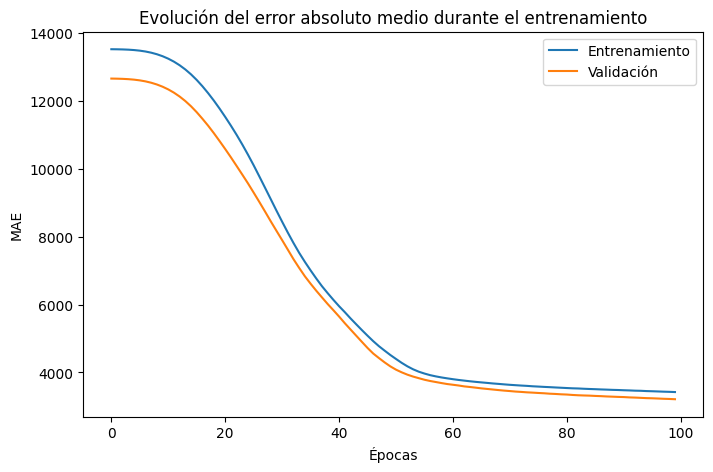

In [6]:
# ============================================
# Celda 5: Evaluar el modelo y graficar resultados
# ============================================

# Evaluar el modelo en datos de prueba
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")

# Verificar si cumple con el reto (< 3500)
if mae < 3500:
    print("🎯 ¡Reto superado! El modelo predice con un error menor a $3500.")
else:
    print("⚠️ El modelo no cumple el umbral de precisión. Intenta ajustar las capas o el número de épocas.")

# Graficar pérdida (MAE) durante el entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.title('Evolución del error absoluto medio durante el entrenamiento')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


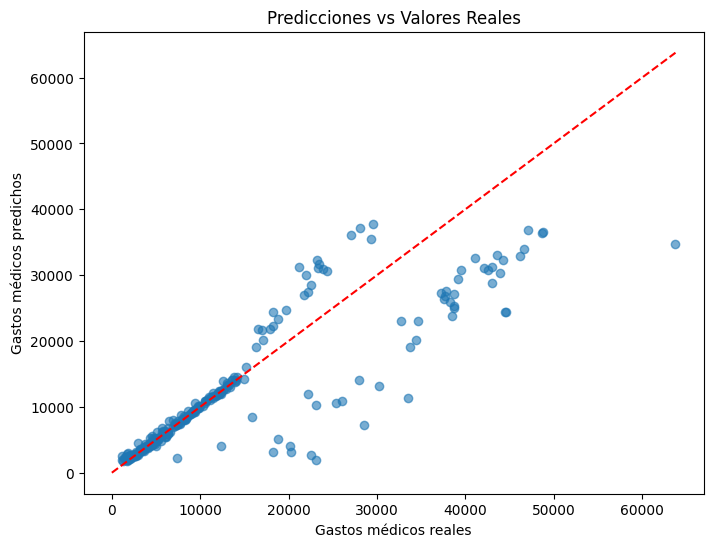

In [7]:
# ============================================
# Celda 6: Predicciones sobre el conjunto de prueba
# ============================================

predictions = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Gastos médicos reales")
plt.ylabel("Gastos médicos predichos")
plt.title("Predicciones vs Valores Reales")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()
